In [1]:
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as scs
import numpy as np
import pandas as pd

In [2]:
mc = pymongo.MongoClient() 

db = mc['movies_metadata']


In [3]:
mc.database_names()

['admin', 'local', 'movies_metadata', 'nyt_dump', 'tweets']

In [4]:
db.collection_names()

['test', 'movies', 'movies_backup', 'movies_clean_v2', 'movies_clean']

In [5]:
test = db['test']  # Use (or create) a collection called 'test'
movies = db['movies'] #Create a collection called movies
movies_clean_v2 = db['movies_clean_v2']

In [6]:
len(list(movies_clean_v2.find()))

1583

In [7]:
df_clean = pd.DataFrame(list(movies_clean_v2.find()))
df_clean.head()

,_id,data,title
0,5afb21667cfdd32058932636,"{'': '', 'Domestic Box Office': '620181382', '...",Star Wars Ep. VIII: The Last Jedi (2017)
1,5afb21677cfdd32058932637,"{'': '', 'Domestic Box Office': '504014165', '...",Beauty and the Beast (2017)
2,5afb21677cfdd32058932638,"{'': '', 'Domestic Box Office': '225764765', '...",The Fate of the Furious (2017)
3,5afb21677cfdd32058932639,"{'': '', 'Domestic Box Office': '264624300', '...",Despicable Me 3 (2017)
4,5afb21687cfdd3205893263a,"{'': '', 'Domestic Box Office': '404353892', '...",Jumanji: Welcome to the Jungle (2017)


In [8]:
df_clean_data = pd.DataFrame(list(df_clean['data']))
df_clean_data.head()

,,1st Assistant Director,3-D and Digital Image Producer,3D Animator,3D Stereoscopic Supervisor,ADR Editor,ADR Mixer,ADR Recording Engineer,ADR/Dialogue Editor,Action Choreographer,...,Visual Effects Supervisor: MPC,Visual Effects Supervisor: Milk Visual Effects,Visual Effects by,Wardrobe Supervisor,Worldwide Box Office,Written By,Written by,based on the novel “A Monster Calls” by,lead_cast,story based on a novel by
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1320214241,NaN,NaN,NaN,"[Mark Hamill, Carrie Fisher, Adam Driver, Dais...",NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1263109573,NaN,NaN,NaN,"[Emma Watson, Dan Stevens, Luke Evans, Kevin K...",NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1237466026,NaN,NaN,NaN,"[Vin Diesel, Dwayne Johnson, Jason Statham, Mi...",NaN
3,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1034542646,NaN,NaN,NaN,"[Steve Carell, Kristen Wiig, Trey Parker]",NaN
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,958513171,NaN,NaN,NaN,"[Dwayne Johnson, Jack Black, Kevin Hart, Karen...",NaN


In [9]:
# df_clean_data_trim = df_clean_data.loc[:, ['Worldwide Box Office', 'Domestic Box Office', 'International Box Office','Production Budget','Source']]
# df_clean_data_trim

In [10]:
# df_clean_data_trim['WW Aggregate'] = int(df_clean_data_trim['Domestic Box Office']) + int(df_clean_data_trim['International Box Office'])
# df_clean_data_trim

# df_clean_data_trim['Domestic Box Office'].fillna(0, inplace=True)
# df_clean_data_trim['International Box Office'].fillna(0, inplace=True)
# df_clean_data_trim['Production Budget'].fillna(10000000, inplace=True)

# df_clean_data_trim['Domestic Box Office'] = df_clean_data_trim['Domestic Box Office'].apply(pd.to_numeric)
# df_clean_data_trim['International Box Office'] = df_clean_data_trim['International Box Office'].apply(pd.to_numeric)
# df_clean_data_trim['ww_agg'] = df_clean_data_trim['Domestic Box Office'] + df_clean_data_trim['International Box Office']
# df_clean_data_trim['Production Budget'] = df_clean_data_trim['Production Budget'].apply(pd.to_numeric)

# df_clean_data_trim['log_ww_agg'] = df_clean_data_trim['ww_agg'].apply(np.log)
# df_clean_data_trim['log_budget'] = df_clean_data_trim['Production Budget'].apply(np.log)

# df_clean_data_trim.head()

In [160]:
df_clean_data_trim['Director'] = parse_directors(df_clean_data)

In [161]:
group_director = df_clean_data_trim.groupby('Director')

In [170]:
top_10_directors = group_director.mean().sort_values(by='ww_agg', ascending=False).head(10)

Text(0.5,1,'Top 10 average earnings of directors from 2015-2017')

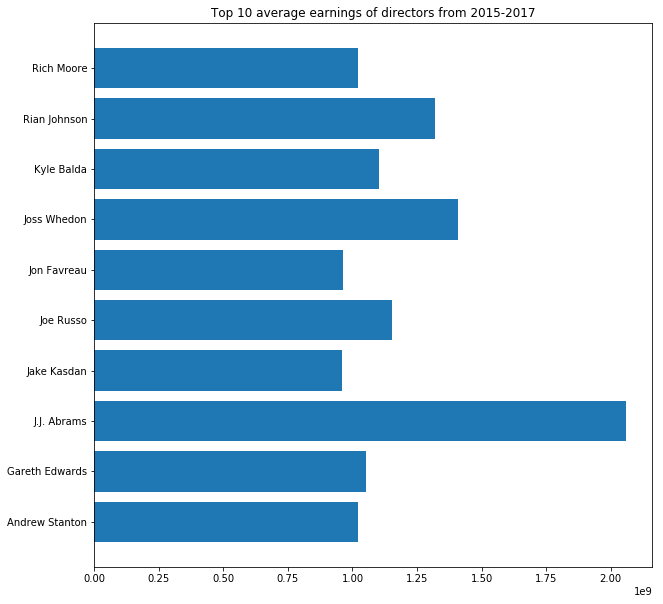

In [183]:
fig, ax = plt.subplots(1,figsize=(10,10))
ax.barh(top_10_directors.index, width = top_10_directors['ww_agg'] )
ax.set_title('Top 10 average earnings of directors from 2015-2017')

In [178]:
top_10_directors

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget,is_franchise
Director,,,,,,,
J.J. Abrams,936662225.0,1.122000e+09,306000000.0,2.058662e+09,21.445322,19.539096,1.0
Joss Whedon,459005868.0,9.492129e+08,330600000.0,1.408219e+09,21.065591,19.616420,1.0
Rian Johnson,620181382.0,7.000329e+08,10000000.0,1.320214e+09,21.001060,16.118096,1.0
Joe Russo,408084349.0,7.452201e+08,250000000.0,1.153304e+09,20.865897,19.336971,1.0
Kyle Balda,300335035.0,8.005590e+08,74500000.0,1.100894e+09,20.817569,18.126287,1.0
Gareth Edwards,532177324.0,5.188112e+08,200000000.0,1.050988e+09,20.772997,19.113828,1.0
Andrew Stanton,486295561.0,5.363218e+08,200000000.0,1.022617e+09,20.745631,19.113828,1.0
Rich Moore,341268248.0,6.786527e+08,150000000.0,1.019921e+09,20.742991,18.826146,0.0
Jon Favreau,364001123.0,5.999000e+08,175000000.0,9.639011e+08,20.686499,18.980297,0.0


In [14]:
# df_clean_data_trim['WW Aggregate'] = int(df_clean_data_trim['Domestic Box Office']) + int(df_clean_data_trim['International Box Office'])
# df_clean_data_trim
def create_ww(dataframe):
    dom = dataframe['Domestic Box Office'].fillna(0, inplace=False)
    intl = dataframe['International Box Office'].fillna(0, inplace=False)
    #nulls will be replaced with $25 mil for now, but might change depending on model results.
    
    budget = dataframe['Production Budget'].fillna(25000000, inplace=False)
    
    df = pd.DataFrame()
    
    dom_numeric = dom.apply(pd.to_numeric)
    intl_numeric = intl.apply(pd.to_numeric)
    
    df['ww_agg'] = dom_numeric + intl_numeric
    df['production_budget'] = budget.apply(pd.to_numeric)

    
    df['log_ww_agg'] = df['ww_agg'].apply(np.log)
    df['log_budget'] = df['production_budget'].apply(np.log)

    return df

In [12]:
# df_x = create_ww(df_clean_data)
# df_x

,ww_agg,production_budget,log_ww_agg,log_budget
0,1320214241,25000000,21.001060,17.034386
1,1263109573,160000000,20.956842,18.890684
2,1237466026,250000000,20.936332,19.336971
3,1034542646,75000000,20.757225,18.132999
4,958513171,90000000,20.680894,18.315320
5,880210429,175000000,20.595672,18.980297
6,863197744,200000000,20.576154,19.113828
7,850653412,180000000,20.561515,19.008467
8,817012815,150000000,20.521165,18.826146
9,800398408,175000000,20.500620,18.980297


In [15]:
def build_clean_dataset(dataframe):
    df = create_ww(dataframe)
    df['ratings'] = parse_mpaa_col(dataframe)
    df['runtime'] = parse_runtime_col(dataframe)
    df['is_franchise'] = create_franchise_dummy(dataframe)
    df['genre'] = parse_genre(dataframe)
    df['prod_method'] = parse_prod_method(dataframe)
    df['creative'] = parse_creative(dataframe)
    df['source'] = parse_source(dataframe)
    df['month'], df['day'], df['year'] = parse_release_date(dataframe)
    return df

def parse_mpaa_col(dataframe):
    ratings = dataframe.loc[:,'MPAA Rating']
    ratings = ratings.apply(lambda a: str(a))
    ratings = ratings.apply(lambda b: b.split()[0])
    ratings = ratings.apply(strip_text)
    return ratings

def strip_text(bad_text):
    if bad_text.endswith('(Rating'):
        bad_text = bad_text.replace('(Rating', '')
    return bad_text

def parse_runtime_col(dataframe):
    runtime = dataframe['Running Time']
    runtime = runtime.fillna(90) #This was the runtime with highest frequency
    runtime = runtime.apply(lambda x: str(x))
    runtime = runtime.apply(lambda x: x.split()[0])
    runtime = runtime.apply(int)
    return runtime

def create_franchise_dummy(dataframe):
    franchise = dataframe['Franchise'].isna() ^ 1
    return franchise

def parse_genre(dataframe):
    genre = dataframe['Genre']
    return genre

def parse_prod_method(dataframe):
    prod_method = dataframe['Production Method']
    return prod_method

def parse_creative(dataframe):
    creative = dataframe['Creative Type']
    return creative

def parse_source(dataframe):
    source = dataframe['Source']
    return source

def parse_release_date(dataframe):
    months = []
    days = []
    years = []
    for date in dataframe['Domestic Releases']:
        if date == date: #checking if null. if true then not null
            month = list(date.split(' '))[0]
            day = list(date.split(' '))[1]
            year = list(date.split(' '))[2]
        else:
            month = None
            day = None
            year = None
        months.append(month)
        days.append(day)
        years.append(year)
    return months, days, years

def parse_directors(dataframe):
    
    director = []
    for i in range(len(dataframe['Director'])):
        if type(dataframe['Director'][i]) == list:
            director.append(dataframe['Director'][i][1])
        else:
            director.append(dataframe['Director'][i])
    return pd.Series(director)


In [16]:
df_ready_for_model = build_clean_dataset(df_clean_data)

In [17]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [18]:
import pymc3 as pm

In [14]:
with pm.Model() as model:
    sd = pm.HalfNormal('sd', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    observed = pm.Normal('observed', intercept + beta_runtime * df_ready_for_model.runtime, sd, observed=df_ready_for_model.log_ww_agg)
    

In [15]:
with model:
    trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_runtime, intercept, sd_log__]
 16%|█▋        | 1807/11000 [00:05<00:26, 345.81it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '4973' (I am process '4974')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ryan/.theano/compiledir_Linux-4.13--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.4-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '4973' (I am process '4975')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ryan/.theano/compiledir_Linux-4.13--generic-x86_64-with-debian-stretch-sid-x86_64-3.6.4-64/lock_dir
 40%|███▉      | 4352/11000 [00:11<00:16, 392.32it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '4974' (I am process '4975')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ryan/.theano/compile

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4892cbd0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4892bb47b8>]], dtype=object)

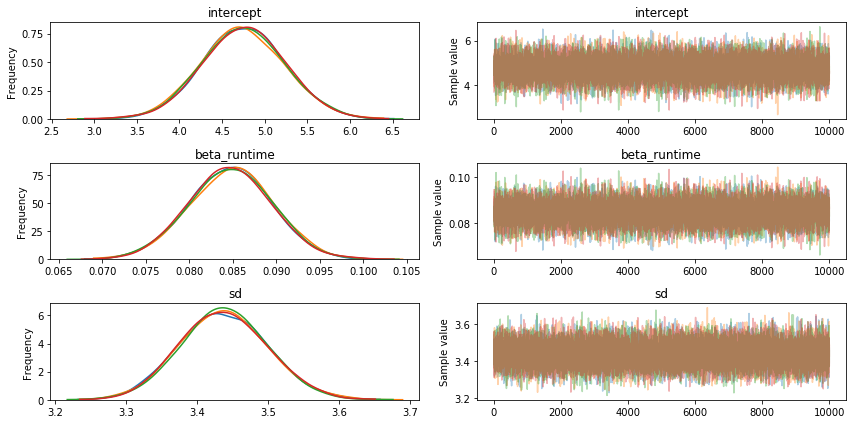

In [16]:
pm.traceplot(trace)

In [17]:
trace[200]

{'beta_runtime': 0.082205950905181693,
 'intercept': 5.0819920905399041,
 'sd': 3.4823932805291373,
 'sd_log__': 1.2477197817023826}

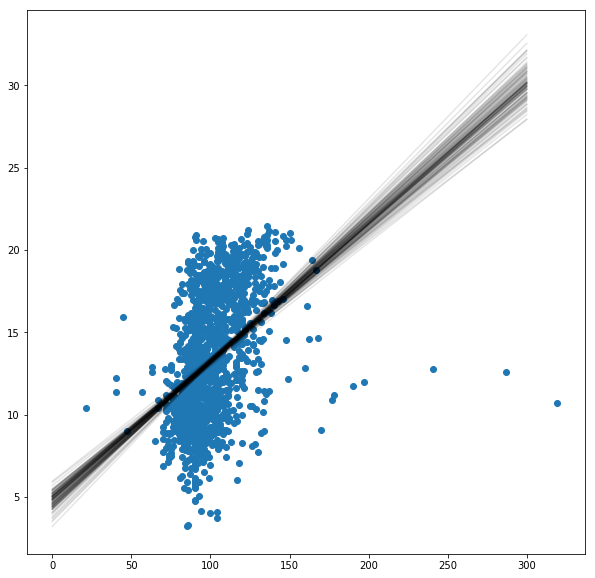

In [18]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,300],[point['intercept'],point['intercept'] + point['beta_runtime'] * 300], 'k', alpha=.1)
        
# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.runtime, df_ready_for_model.log_ww_agg)

In [20]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [21]:
df_dummies_ratings = pd.get_dummies(df_ready_for_model.ratings)
df_dummies_ratings

,G,Not,PG,PG-13,R,nan
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,0,1,0,0,0


In [22]:
df_dummies_genre = pd.get_dummies(df_ready_for_model.genre)
df_dummies_genre

,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Multiple Genres,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
df_dummies_prod_method = pd.get_dummies(df_ready_for_model.prod_method)
df_dummies_prod_method

,Animation/Live Action,Digital Animation,Hand Animation,Live Action,Multiple Production Methods,Stop-Motion Animation
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


In [24]:
df_dummies_creative = pd.get_dummies(df_ready_for_model.creative)
df_dummies_creative

,Contemporary Fiction,Dramatization,Factual,Fantasy,Historical Fiction,Kids Fiction,Multiple Creative Types,Science Fiction,Super Hero
0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0


In [25]:
df_dummies_source = pd.get_dummies(df_ready_for_model.source)
df_dummies_source

,Based on Comic/Graphic Novel,Based on Factual Book/Article,Based on Fiction Book/Short Story,Based on Folk Tale/Legend/Fairytale,Based on Game,Based on Movie,Based on Musical Group,Based on Musical or Opera,Based on Play,Based on Real Life Events,Based on Religious Text,Based on Short Film,Based on TV,Based on Theme Park Ride,Based on Toy,Based on Web Series,Compilation,Original Screenplay,Remake,Spin-Off
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df_dummies_month = pd.get_dummies(df_ready_for_model.month)
df_dummies_month

,April,August,December,Fall,February,January,July,June,March,May,November,October,September
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
df_with_dummies = df_ready_for_model[['log_ww_agg', 'log_budget', 'runtime', 'is_franchise']]

In [28]:
df_with_all_dummies = pd.concat([df_with_dummies, df_dummies_ratings, df_dummies_genre, df_dummies_prod_method, df_dummies_creative,
          df_dummies_source, df_dummies_month], axis =1)
df_with_all_dummies

,log_ww_agg,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,...,Fall,February,January,July,June,March,May,November,October,September
0,21.001060,17.034386,150,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.956842,18.890684,123,False,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,20.936332,19.336971,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.757225,18.132999,90,True,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20.680894,18.315320,119,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20.595672,18.980297,133,True,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,20.576154,19.113828,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,20.561515,19.008467,130,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,20.521165,18.826146,141,True,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,20.500620,18.980297,105,False,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
len(df_with_all_dummies.columns)

71

In [29]:
with pm.Model() as model_2:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    beta_log_budget = pm.Normal('beta_log_budget', 17, 5)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime
                                                     + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)


In [30]:
with model_2:
    trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_log_budget, beta_runtime, intercept, sd_log__]
100%|██████████| 11000/11000 [01:58<00:00, 92.74it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48900a8828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4888387fd0>]], dtype=object)

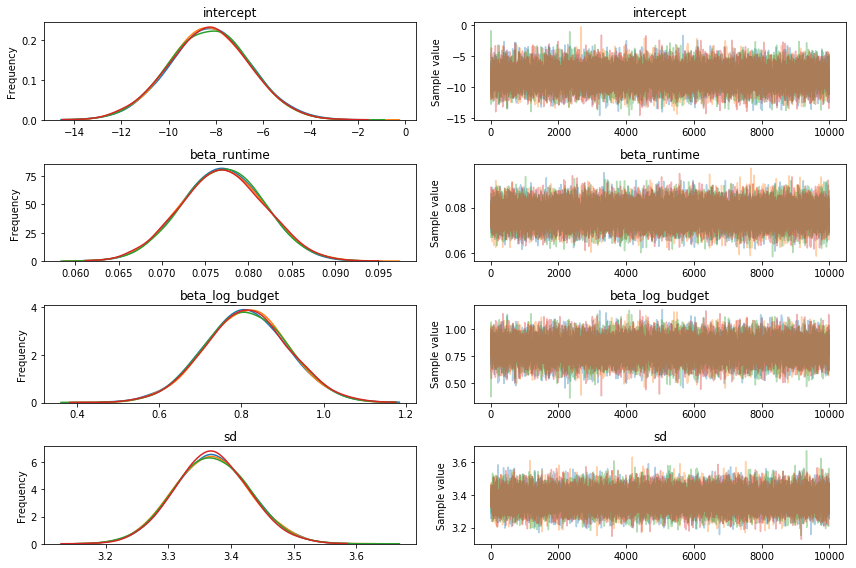

In [31]:
pm.traceplot(trace)

In [32]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,-8.274836,1.681531,0.012983,-11.551537,-4.932397,15440.343982,1.000134
beta_runtime,0.077056,0.004719,0.000028,0.067872,0.086218,27363.702739,0.999967
beta_log_budget,0.811807,0.100082,0.000762,0.620357,1.012772,15198.381285,1.000107
sd,3.369901,0.059419,0.000339,3.252840,3.485447,28807.155631,1.000013


In [33]:
model_2.sd

sd

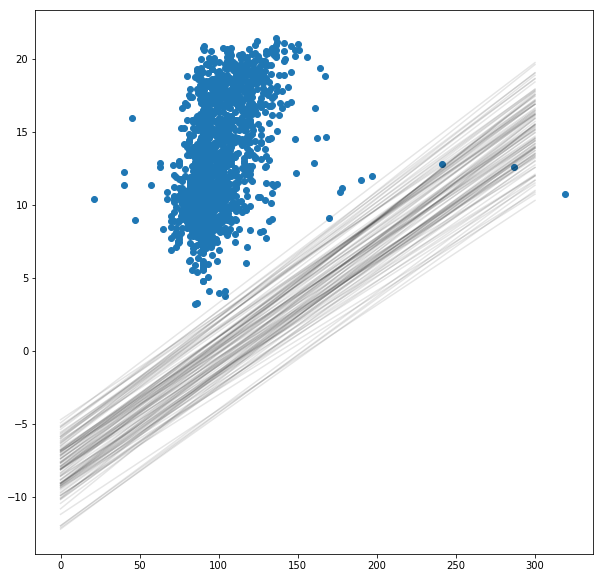

In [34]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,300],[point['intercept'], point['intercept'] + point['beta_runtime'] * 300], 'k', alpha=.1)
        
# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.runtime, df_ready_for_model.log_ww_agg)

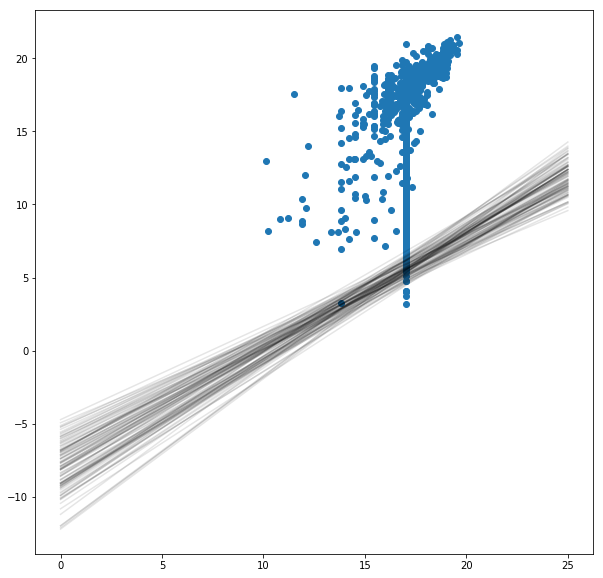

In [35]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,25],[point['intercept'],point['intercept'] + point['beta_log_budget'] * 25], 'k', alpha=.1)

# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.log_budget, df_ready_for_model.log_ww_agg)

Text(0.5,1,'Frequencies of log(budget)')

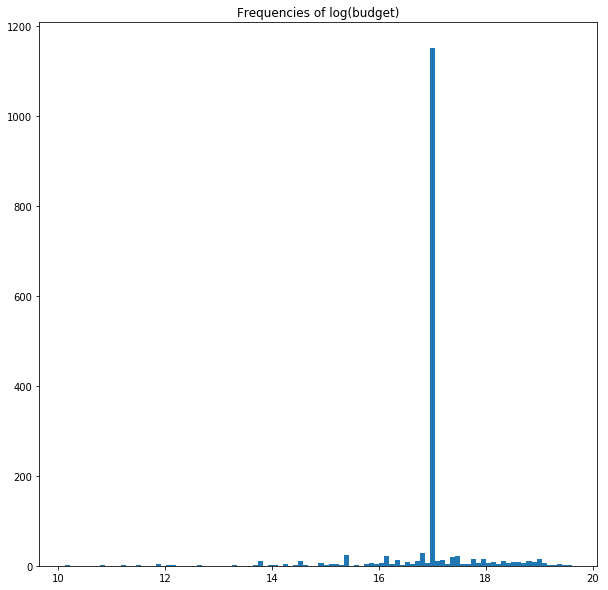

In [36]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_ready_for_model['log_budget'], bins = 100)
ax.set_title('Frequencies of log(budget)')

Text(0.5,1,'Frequencies of log(revenue)')

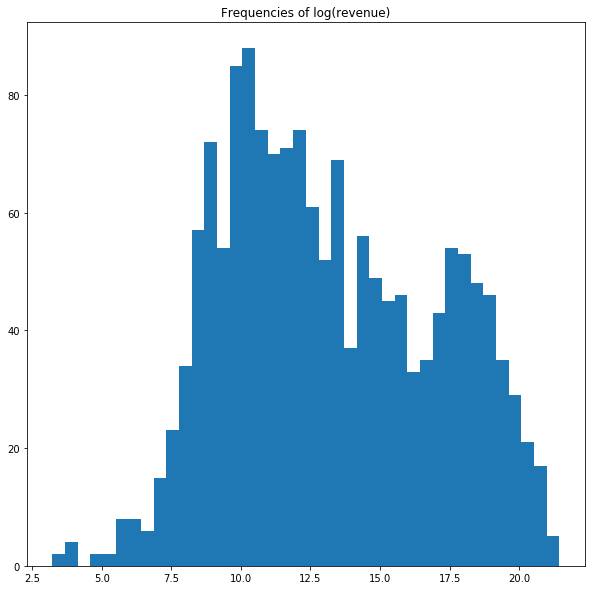

In [37]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_ready_for_model['log_ww_agg'], bins = 40)
ax.set_title('Frequencies of log(revenue)')

In [38]:
from pymc3 import summary

In [39]:
summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
intercept,-8.274836,1.681531,0.012983,-11.551537,-4.932397,15440.343982,1.000134
beta_runtime,0.077056,0.004719,0.000028,0.067872,0.086218,27363.702739,0.999967
beta_log_budget,0.811807,0.100082,0.000762,0.620357,1.012772,15198.381285,1.000107
sd,3.369901,0.059419,0.000339,3.252840,3.485447,28807.155631,1.000013


In [40]:
df_clean_data['Domestic Releases']

0       December 15th 2017 (Wide) by Walt DisneyDecemb...
1       March 17th 2017 (Wide) by Walt DisneyMarch 17t...
2       April 14th 2017 (Wide) by UniversalApril 14th ...
3                      June 30th 2017 (Wide) by Universal
4              December 20th 2017 (Wide) by Sony Pictures
5       July 7th 2017 (Wide) by Sony PicturesJuly 7th ...
6                      May 5th 2017 (Wide) by Walt Disney
7                 November 3rd 2017 (Wide) by Walt Disney
8                    June 2nd 2017 (Wide) by Warner Bros.
9                November 22nd 2017 (Wide) by Walt Disney
10      May 26th 2017 (Wide) by Walt DisneyMay 26th 20...
11              September 8th 2017 (Wide) by Warner Bros.
12              November 17th 2017 (Wide) by Warner Bros.
13              March 3rd 2017 (Wide) by 20th Century Fox
14      June 21st 2017 (Wide) by Paramount PicturesJun...
15      March 10th 2017 (Wide) by Warner Bros.March 10...
16             March 31st 2017 (Wide) by 20th Century Fox
17      July 2

In [41]:
mo, da, ye = parse_release_date(df_clean_data)

In [42]:
def parse_day(day_column):
    days = []
    for day in day_column:
        if day == None:
            day_clean = None
        else:
            day_clean = day.strip('abcdefghijklmnopqrstuvwxyz')
        days.append(day_clean)
    return days

In [43]:
days_clean = parse_day(da)

In [44]:
np.array(mo) + np.array(days_clean)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [45]:
df_with_all_dummies.columns

Index(['log_ww_agg', 'log_budget', 'runtime', 'is_franchise', 'G', 'Not', 'PG',
       'PG-13', 'R', 'nan', 'Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror',
       'Multiple Genres', 'Musical', 'Romantic Comedy', 'Thriller/Suspense',
       'Western', 'Animation/Live Action', 'Digital Animation',
       'Hand Animation', 'Live Action', 'Multiple Production Methods',
       'Stop-Motion Animation', 'Contemporary Fiction', 'Dramatization',
       'Factual', 'Fantasy', 'Historical Fiction', 'Kids Fiction',
       'Multiple Creative Types', 'Science Fiction', 'Super Hero',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religious Text',
       'Based on Shor

In [46]:
df_clean_data['lead_cast']


0       [Mark Hamill, Carrie Fisher, Adam Driver, Dais...
1       [Emma Watson, Dan Stevens, Luke Evans, Kevin K...
2       [Vin Diesel, Dwayne Johnson, Jason Statham, Mi...
3               [Steve Carell, Kristen Wiig, Trey Parker]
4       [Dwayne Johnson, Jack Black, Kevin Hart, Karen...
5       [Tom Holland, Michael Keaton, Zendaya, Jon Fav...
6       [Chris Pratt, Zoe Saldana, Dave Bautista, Vin ...
7       [Chris Hemsworth, Tom Hiddleston, Cate Blanche...
8                                 [Gal Gadot, Chris Pine]
9       [Anthony Gonzalez, Gael Garcia Bernal, Benjami...
10            [Johnny Depp, Javier Bardem, Geoffrey Rush]
11                     [Jaeden Lieberher, Bill Skarsgård]
12      [Ben Affleck, Henry Cavill, Gal Gadot, Jason M...
13                             [Hugh Jackman, Dafne Keen]
14                          [Mark Wahlberg, Peter Cullen]
15       [Tom Hiddleston, Samuel L. Jackson, Brie Larson]
16                                         [Alec Baldwin]
17            

In [47]:
df_clean_data['Producer']


0                         [Kathleen Kennedy, Ram Bergman]
1                        [David Hoberman, Todd Lieberman]
2       [Neal H. Moritz, Vin Diesel, Michael Fottrell,...
3                   [Christopher Meledandri, Janet Healy]
4                         [Matt Tolmach, William Teitler]
5                               [Kevin Feige, Amy Pascal]
6                                             Kevin Feige
7                                             Kevin Feige
8       [Charles Roven, Zack Snyder, Deborah Snyder, R...
9                                      Darla K. Anderson*
10                                      Jerry Bruckheimer
11      [Dan Lin, Roy Lee, David Katzenberg, Barbara M...
12      [Charles Roven, Deborah Snyder, Geoff Johns, J...
13      [Simon Kinberg, Hutch Parker, Lauren Shuler Do...
14      [Don Murphy, Tom DeSanto, Lorenzo di Bonaventu...
15      [Thomas Tull, Mary Parent, Jon Jashni, Alex Ga...
16                                       Ramsey Ann Naito
17            

In [48]:
# pm.gp.Marginal(cov_func = pm.)

In [49]:
with pm.Model() as model_3:
#     sd = pm.HalfNormal('sd', 100)
#     intercept = pm.Normal('intercept', 0, 100)
    pm.glm.GLM.from_formula('log_ww_agg ~  is_franchise ', df_ready_for_model)
    trace=pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, is_franchise[T.True], Intercept]
  0%|          | 0/11000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#Generate fake data
xmin = 0
xmax = 40
n_x1es = 200
n_x2es = 200
x1es = scs.uniform(xmin, xmax).rvs(n_x1es)
x2es = scs.uniform(xmin, xmax).rvs(n_x2es)
yes = x1es + x2es +scs.norm(0, 10).rvs(n_x1es)
df = pd.DataFrame({'x1': x1es, 'x2': x2es, 'y': yes})
# fig, ax = plt.subplots()
# ax.scatter(df.x1, df.y)

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
with pm.Model() as model:
   pm.glm.GLM.from_formula('y ~ x1 + x2', df)
   trace = pm.sample(10000, tune = 1000)

In [ ]:
pm.summary(trace)

In [ ]:
df_with_all_dummies.head()

In [50]:
df_experiment_2 = df_ready_for_model.iloc[:200,:]

In [51]:
%%time
with pm.Model() as model_4:
   pm.glm.GLM.from_formula('log_ww_agg ~ runtime', df_experiment_2)
   trace_4 = pm.sample(10000, tune = 1000, cores = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, runtime, Intercept]
100%|██████████| 11000/11000 [00:37<00:00, 294.50it/s]
The acceptance probability does not match the target. It is 0.886658489538, but should be close to 0.8. Try to increase the number of tuning steps.


CPU times: user 1.42 s, sys: 211 ms, total: 1.63 s
Wall time: 38.6 s


In [ ]:
pm.summary(trace_4)

In [ ]:
df_experiment_3 = df_ready_for_model.iloc[:255,:]

In [ ]:
with pm.Model() as model_5:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime,
#                                                      + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)


In [ ]:
with model_5:
    trace_5 = pm.sample(10000, tune = 1000)

In [ ]:
pm.summary(trace_5)

In [ ]:
with pm.Model() as model_6:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    beta_log_budget = pm.Normal('beta_log_budget', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime
                                                      + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)

In [ ]:
with model_6:
    trace_6 = pm.sample(10000, tune = 1000)

In [ ]:
pm.summary(trace_6)

In [ ]:
with pm.Model() as model_7:
    sd = pm.HalfNormal('sd', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    beta_log_budget = pm.Normal('beta_log_budget', 0, 100)
    beta_is_franchise = pm.Normal('beta_is_franchise', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime
                                                      + beta_log_budget * df_ready_for_model.log_budget
                                                      + beta_is_franchise * df_ready_for_model.is_franchise, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)

In [ ]:
with model_7:
    trace_7 = pm.sample(1000, cores = 4, start = pm.find_MAP())

In [ ]:
pm.summary(trace_7)

In [ ]:
n_xpts = 100
n_rnd = 200
xmin = 0
xmax = 40
fix, ax = plt.subplots(figsize=(10,7))
# ax.scatter(df.x, df.y)
for i, point in enumerate(trace_7):
   if i%10 == 0:
       ax.plot([xmin, xmax],
               [point['intercept'] + point['beta_runtime']*xmin + point['beta_log_budget']*xmin + point['beta_is_franchise']*xmin,
                point['intercept'] + point['beta_runtime']*xmax + point['beta_log_budget']*xmax + point['beta_is_franchise']*xmax],
               'k', alpha=0.05)

xpts = np.linspace(xmin, xmax, n_xpts).reshape(-1, 1, 1)
rnd = scs.norm(0,1).rvs(n_rnd).reshape(-1, 1)
ypts = trace_7['intercept'] + xpts * trace_7['beta_runtime'] + xpts * trace_7['beta_log_budget'] + xpts * trace_7['beta_is_franchise'] + rnd*trace_7['sd']
ypts = ypts.reshape(n_xpts, -1)
xpts = xpts.reshape(-1)
print (ypts.shape)
for xpt, ypt in zip(xpts, ypts):
   ax.plot([xpt], [np.percentile(ypt, 95)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 5)], 'r.')

In [ ]:
n_xpts = 100
n_rnd = 200
xmin = 0
xmax = 40
fix, ax = plt.subplots(figsize=(10,7))
# ax.scatter(df.x, df.y)
for i, point in enumerate(trace_6):
   if i%100 == 0:
       ax.plot([xmin, xmax],
               [point['intercept'] + point['beta_runtime']*xmin + point['beta_log_budget']*xmin,
                point['intercept'] + point['beta_runtime']*xmax + point['beta_log_budget']*xmax],
               'k', alpha=0.05)

xpts = np.linspace(xmin, xmax, n_xpts).reshape(-1, 1, 1)
rnd = scs.norm(0,1).rvs(n_rnd).reshape(-1, 1)
ypts = trace_6['intercept'] + xpts * trace_6['beta_runtime'] + xpts * trace_6['beta_log_budget'] + rnd*trace_6['sd']
ypts = ypts.reshape(n_xpts, -1)
xpts = xpts.reshape(-1)
print (ypts.shape)
for xpt, ypt in zip(xpts, ypts):
   ax.plot([xpt], [np.percentile(ypt, 95)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 50)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 5)], 'r.')

In [ ]:
with pm.Model() as model_5:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime,
#                                                      + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)


In [ ]:
with model_5:
    trace_5 = pm.sample(10000, tune = 1000)

In [ ]:
pm.summary(trace_5)

In [ ]:
n_xpts = 100
n_rnd = 200
xmin = 0
xmax = 300
fix, ax = plt.subplots(figsize=(10,7))
# ax.scatter(df.x, df.y)
for i, point in enumerate(trace_5):
   if i%100 == 0:
       ax.plot([xmin, xmax],
               [point['intercept'] + point['beta_runtime']*xmin,
                point['intercept'] + point['beta_runtime']*xmax ],
               'k', alpha=0.05)

xpts = np.linspace(xmin, xmax, n_xpts).reshape(-1, 1, 1)
rnd = scs.norm(0,1).rvs(n_rnd).reshape(-1, 1)
ypts = trace_5['intercept'] + xpts * trace_5['beta_runtime'] + rnd*trace_5['sd']
ypts = ypts.reshape(n_xpts, -1)
xpts = xpts.reshape(-1)
print (ypts.shape)
for xpt, ypt in zip(xpts, ypts):
   ax.plot([xpt], [np.percentile(ypt, 95)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 50)], 'r.')
   ax.plot([xpt], [np.percentile(ypt, 5)], 'r.')

In [19]:
df_with_all_dummies

NameError: name 'df_with_all_dummies' is not defined

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_with_all_dummies.iloc[:,1:], df_with_all_dummies.iloc[:,0])

In [99]:
regr = RandomForestRegressor(n_estimators = 5000, max_depth = 3, random_state = 0)

In [100]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
y_pred = regr.predict(X_test)

In [102]:
y_train_pred = regr.predict(X_train)

In [103]:
#Train mse
mean_squared_error(y_train, y_train_pred)

5.7871877692537881

In [104]:
#Test mse
mean_squared_error(y_test, y_pred)

5.6512499837889658

In [105]:
gboost = GradientBoostingRegressor(n_estimators = 1000)

In [106]:
gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [107]:
y_pred = gboost.predict(X_test)

In [108]:
y_train_pred = gboost.predict(X_train)

In [109]:
#Train mse
mean_squared_error(y_train, y_train_pred)

1.6118619126532376

In [110]:
#Test mse
mean_squared_error(y_test, y_pred)

5.3650475761303209

In [111]:
X = df_with_all_dummies.iloc[:,1:]
y = df_with_all_dummies.iloc[:,0]

In [112]:
gboost.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [113]:
y_pred = gboost.predict(X)

In [114]:
mean_squared_error(y, y_pred)

1.9432668777926345

In [ ]:
#Tuning RF model


In [130]:
rf_features_5 = RandomForestRegressor(n_estimators = 5000, max_features = 5, max_depth = 3, random_state = 0)

In [135]:
rf_features_5.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [137]:
y_pred = rf_features_5.predict(X_test)

In [142]:
y_pred[-1]

13.245174240364058

In [145]:
mean_squared_error(y_test, y_pred)

8.6036492748843596

In [146]:
rf_features_10 = RandomForestRegressor(n_estimators = 5000, max_features = 10, max_depth = 3, random_state = 0)

In [147]:
rf_features_10.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [148]:
y_pred = rf_features_10.predict(X_test)

In [149]:
mean_squared_error(y_test, y_pred)

7.1332616232632313

In [150]:
rf_features_20 = RandomForestRegressor(n_estimators = 5000, max_features = 20, max_depth = 3, random_state = 0)

In [151]:
rf_features_20.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [152]:
y_pred = rf_features_20.predict(X_test)

In [153]:
mean_squared_error(y_test, y_pred)

6.199470135640782

In [154]:
rf_features_35 = RandomForestRegressor(n_estimators = 5000, max_features = 35, max_depth = 3, random_state = 0)

In [155]:
rf_features_35.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=35, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [156]:
y_pred = rf_features_35.predict(X_test)

In [157]:
mean_squared_error(y_test, y_pred)

5.8969603254130138

In [158]:
rf_features_max = RandomForestRegressor(n_estimators = 5000, max_depth = 3, random_state = 0)

In [159]:
rf_features_max.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [160]:
y_pred = rf_features_max.predict(X_test)

In [161]:
mean_squared_error(y_test, y_pred)

5.927433675999783

In [162]:
rf_trees_1000 = RandomForestRegressor(n_estimators = 1000, max_depth = 3, random_state = 0)

In [166]:
rf_trees_1000.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [167]:
y_pred = rf_trees_1000.predict(X_test)

In [168]:
#1k trees about the same as 5k trees. stick w/ 1k
mean_squared_error(y_test, y_pred)

5.9290235773586035

In [171]:
rf_depth_5 = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state = 0)

In [172]:
rf_depth_5.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [173]:
y_pred = rf_depth_5.predict(X_test)

In [174]:
mean_squared_error(y_test, y_pred)

5.1456631455132573

In [175]:
rf_depth_10 = RandomForestRegressor(n_estimators = 1000, max_depth = 10, random_state = 0)

In [176]:
rf_depth_10.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [177]:
y_pred = rf_depth_10.predict(X_test)

In [178]:
mean_squared_error(y_test, y_pred)

4.9443091074171095

In [179]:
rf_depth_all = RandomForestRegressor(n_estimators = 1000, max_depth = None, random_state = 0)

In [180]:
rf_depth_all.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [181]:
y_pred = rf_depth_all.predict(X_test)

In [182]:
mean_squared_error(y_pred, y_test)

5.039776799085983

In [184]:
rf_default_params = RandomForestRegressor()

In [218]:
parameters = { 'n_estimators': [10,20,30],'max_depth':list(range(5,71,5)), 'max_features': list(range(5,71,5))}

In [219]:
clf = GridSearchCV(rf_default_params, parameters)

In [220]:
list(range(100,1001,100))

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [221]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 'max_features': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [222]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_max_features',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [223]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [224]:
clf.best_params_

{'max_depth': 10, 'max_features': 20, 'n_estimators': 30}

In [42]:
rf_best_params = RandomForestRegressor(n_estimators = 30, max_depth = 10, max_features = 20)

In [43]:
rf_best_params.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [50]:
y_pred = rf_best_params.predict(X_test)

In [51]:
mean_squared_error(y_test, y_pred)

4.7187273832696963

In [46]:
##Best parameters for Random Forest!
rf_best_params = RandomForestRegressor(n_estimators = 100, max_depth = 10, max_features = 20)

In [47]:
rf_best_params.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [48]:
y_pred_rf_best = rf_best_params.predict(X_test)

In [49]:
mean_squared_error(y_test, y_pred_rf_best)

4.7187273832696963

In [355]:
#Lets do some gradient boosting
gb = GradientBoostingRegressor()

In [290]:
parameters = {'max_depth': [4,6,8], 'min_samples_leaf': [1,2], 
              'max_features': [20,40,None], 'n_estimators': [30,40,50,100]}

In [291]:
gb_gscv = GridSearchCV(gb, parameters)

In [292]:
gb_gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 2], 'max_features': [20, 40, None], 'n_estimators': [30, 40, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [293]:
gb_gscv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=20,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [343]:
gb_gscv.best_params_

{'max_depth': 4, 'max_features': 20, 'min_samples_leaf': 1, 'n_estimators': 50}

In [344]:
gb_best_params = GradientBoostingRegressor(learning_rate=0.1, max_depth = 4, max_features = 20, min_samples_leaf = 1, 
                                          n_estimators = 50)

In [356]:
gb_best_params.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=20,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [357]:
y_pred_gb_best = gb_best_params.predict(X_test)

In [361]:
mean_squared_error(y_test, y_pred_gb_best)

4.7457086364359817

In [362]:
df_with_all_dummies.columns

Index(['log_ww_agg', 'log_budget', 'runtime', 'is_franchise', 'G', 'Not', 'PG',
       'PG-13', 'R', 'nan', 'Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror',
       'Multiple Genres', 'Musical', 'Romantic Comedy', 'Thriller/Suspense',
       'Western', 'Animation/Live Action', 'Digital Animation',
       'Hand Animation', 'Live Action', 'Multiple Production Methods',
       'Stop-Motion Animation', 'Contemporary Fiction', 'Dramatization',
       'Factual', 'Fantasy', 'Historical Fiction', 'Kids Fiction',
       'Multiple Creative Types', 'Science Fiction', 'Super Hero',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religious Text',
       'Based on Shor

In [373]:
two_X_rows = X_test.iloc[:2,:]

In [368]:
single_X_row = X_test.iloc[0,:]
single_X_row

log_budget                             17.0344
runtime                                     90
is_franchise                             False
G                                            0
Not                                          0
PG                                           0
PG-13                                        0
R                                            0
nan                                          1
Action                                       0
Adventure                                    0
Black Comedy                                 0
Comedy                                       0
Concert/Performance                          0
Documentary                                  1
Drama                                        0
Horror                                       0
Multiple Genres                              0
Musical                                      0
Romantic Comedy                              0
Thriller/Suspense                            0
Western      

In [375]:
rf_best_params.predict(two_X_rows)

array([ 10.53367859,  10.09667196])

In [371]:
single_X_row.reshape(-1,1).shape

/home/ryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(70, 1)

In [376]:
y_test[:2]

1058     4.779123
344     10.820138
Name: log_ww_agg, dtype: float64

In [31]:
df_with_all_dummies.to_csv('data/df_for_model.csv', index = False)

In [384]:
df_ready_for_model.genre.unique()

array(['Adventure', 'Musical', 'Action', 'Horror', 'Drama',
       'Thriller/Suspense', 'Comedy', 'Black Comedy', 'Western',
       'Romantic Comedy', 'Documentary', 'Concert/Performance',
       'Multiple Genres', nan], dtype=object)

In [385]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [387]:
df_ready_for_model.ratings.unique()

array(['PG-13', 'PG', 'R', 'G', 'nan', 'Not'], dtype=object)

In [389]:
df_ready_for_model.is_franchise.unique()


array([ True, False], dtype=bool)

In [390]:
df_ready_for_model.prod_method.unique()

array(['Live Action', 'Animation/Live Action', 'Digital Animation',
       'Multiple Production Methods', 'Hand Animation',
       'Stop-Motion Animation', nan], dtype=object)

In [2]:
import pandas as pd


In [32]:
df = pd.read_csv('data/df_for_model.csv')

In [33]:
df.columns

Index(['log_ww_agg', 'log_budget', 'runtime', 'is_franchise', 'G', 'Not', 'PG',
       'PG-13', 'R', 'nan', 'Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror',
       'Multiple Genres', 'Musical', 'Romantic Comedy', 'Thriller/Suspense',
       'Western', 'Animation/Live Action', 'Digital Animation',
       'Hand Animation', 'Live Action', 'Multiple Production Methods',
       'Stop-Motion Animation', 'Contemporary Fiction', 'Dramatization',
       'Factual', 'Fantasy', 'Historical Fiction', 'Kids Fiction',
       'Multiple Creative Types', 'Science Fiction', 'Super Hero',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religious Text',
       'Based on Shor

In [34]:
df.head()

,log_ww_agg,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,...,Fall,February,January,July,June,March,May,November,October,September
0,21.001060,17.034386,150,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.956842,18.890684,123,False,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,20.936332,19.336971,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.757225,18.132999,90,True,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20.680894,18.315320,119,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = df.iloc[:,1:]

In [36]:
X.head()

,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,Action,...,Fall,February,January,July,June,March,May,November,October,September
0,17.034386,150,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.890684,123,False,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,19.336971,136,True,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,18.132999,90,True,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,18.315320,119,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y = df.iloc[:,0]

0       21.001060
1       20.956842
2       20.936332
3       20.757225
4       20.680894
5       20.595672
6       20.576154
7       20.561515
8       20.521165
9       20.500620
10      20.493549
11      20.362955
12      20.301600
13      20.238071
14      20.219033
15      20.145477
16      20.053870
17      20.031151
18      20.010488
19      19.878796
20      19.832480
21      19.828822
22      19.765114
23      19.758525
24      19.671194
25      19.659388
26      19.555114
27      19.537435
28      19.517677
29      19.488252
          ...    
1553     8.088255
1554     8.048788
1555     7.876259
1556     7.852050
1557     7.835975
1558     7.817625
1559     7.791936
1560     7.717351
1561     7.652071
1562     7.626570
1563     7.551187
1564     7.465655
1565     7.444833
1566     7.404888
1567     7.375882
1568     7.354362
1569     7.302496
1570     7.290975
1571     7.290975
1572     7.265430
1573     7.167809
1574     7.124478
1575     6.943122
1576     6.679599
1577     6

In [52]:
X_test.columns

Index(['log_budget', 'runtime', 'is_franchise', 'G', 'Not', 'PG', 'PG-13', 'R',
       'nan', 'Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror',
       'Multiple Genres', 'Musical', 'Romantic Comedy', 'Thriller/Suspense',
       'Western', 'Animation/Live Action', 'Digital Animation',
       'Hand Animation', 'Live Action', 'Multiple Production Methods',
       'Stop-Motion Animation', 'Contemporary Fiction', 'Dramatization',
       'Factual', 'Fantasy', 'Historical Fiction', 'Kids Fiction',
       'Multiple Creative Types', 'Science Fiction', 'Super Hero',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religious Text',
       'Based on Short Film', 'Base

In [57]:
rf_best_params.predict(X_test.iloc[:2,:])

array([  9.09268259,  19.6297885 ])

In [58]:
len(X_test.columns)

70

In [61]:
single_pred = np.zeros(70)

In [63]:
single_pred[0] = 15

In [64]:
single_pred

array([ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.])

In [66]:
rf_best_params.predict(np.array([single_pred]))

array([ 14.15118376])

In [67]:
np.array([single_pred])

array([[ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]])

In [68]:
single_pred[15] = 1

In [69]:
rf_best_params.predict(np.array([single_pred]))

array([ 13.91621995])

In [70]:
X_test.columns

Index(['log_budget', 'runtime', 'is_franchise', 'G', 'Not', 'PG', 'PG-13', 'R',
       'nan', 'Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror',
       'Multiple Genres', 'Musical', 'Romantic Comedy', 'Thriller/Suspense',
       'Western', 'Animation/Live Action', 'Digital Animation',
       'Hand Animation', 'Live Action', 'Multiple Production Methods',
       'Stop-Motion Animation', 'Contemporary Fiction', 'Dramatization',
       'Factual', 'Fantasy', 'Historical Fiction', 'Kids Fiction',
       'Multiple Creative Types', 'Science Fiction', 'Super Hero',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religious Text',
       'Based on Short Film', 'Base

In [72]:
import src.model


In [74]:
X, y = src.model.get_data('data/df_for_model.csv')

In [162]:
src.model.build_model(X, y)

In [163]:
!ls

app	   geckodriver.log    model_columns.pkl  pymc_stuff.ipynb	  src
data	   LICENSE	      model.pkl		 README.md
EDA.ipynb  model_columns.pk1  notes.txt		 scrape_thenumbers.ipynb


In [79]:
single_pred

array([ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.])

In [155]:
single_pred = np.array([[ np.log(2000000),   90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.]])

In [156]:
float(rf_best_params.predict(single_pred))

13.821377089360732

In [88]:
X_test.columns

Index(['log_budget', 'runtime', 'is_franchise', 'G', 'Not', 'PG', 'PG-13', 'R',
       'nan', 'Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror',
       'Multiple Genres', 'Musical', 'Romantic Comedy', 'Thriller/Suspense',
       'Western', 'Animation/Live Action', 'Digital Animation',
       'Hand Animation', 'Live Action', 'Multiple Production Methods',
       'Stop-Motion Animation', 'Contemporary Fiction', 'Dramatization',
       'Factual', 'Fantasy', 'Historical Fiction', 'Kids Fiction',
       'Multiple Creative Types', 'Science Fiction', 'Super Hero',
       'Based on Comic/Graphic Novel', 'Based on Factual Book/Article',
       'Based on Fiction Book/Short Story',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Game',
       'Based on Movie', 'Based on Musical Group', 'Based on Musical or Opera',
       'Based on Play', 'Based on Real Life Events', 'Based on Religious Text',
       'Based on Short Film', 'Base

In [208]:
df_ready_for_model.source.unique()

array(['Original Screenplay', 'Remake', 'Based on Comic/Graphic Novel',
       'Based on Folk Tale/Legend/Fairytale', 'Based on Theme Park Ride',
       'Based on TV', 'Based on Fiction Book/Short Story',
       'Based on Real Life Events', 'Based on Toy',
       'Based on Factual Book/Article', 'Based on Religious Text',
       'Based on Movie', 'Compilation', 'Based on Musical or Opera',
       'Based on Play', 'Based on Short Film', 'Based on Musical Group',
       'Spin-Off', 'Based on Game', 'Based on Web Series', nan], dtype=object)

In [173]:
index = np.where(np.array(X.columns == 'Action'))

In [176]:
index[0][0]

9

In [185]:
prediction_array = np.array([[ 15.,   90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.]])

In [180]:
prediction_array[0][9] = 1

In [188]:
prediction_array[0][0] = 20

In [189]:
prediction_array

array([[ 20.,  90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]])

In [190]:
df_prediction_array = pd.DataFrame(prediction_array)

In [192]:
df_prediction_array.columns = X_test.columns

In [193]:
df_prediction_array

,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,Action,...,Fall,February,January,July,June,March,May,November,October,September
0,20.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
df_prediction_array.loc[0]['is_franchise'] = 1

In [197]:
df_prediction_array

,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,Action,...,Fall,February,January,July,June,March,May,November,October,September
0,20.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
rf_best_params.predict(df_prediction_array)

array([ 18.53013013])

In [199]:
rf_best_params.predict(np.array(df_prediction_array))

array([ 18.53013013])

In [214]:
df_clean_data['Production Budget'].isna().sum()

1138

In [227]:
budget = df_clean_data['Production Budget']

In [230]:
new_budget = budget.apply(pd.to_numeric)

In [236]:
budget_nonans = new_budget[new_budget > 1]

In [244]:
df_clean_data_nobudgetnans = df_clean_data[new_budget >1]

In [247]:
len(df_clean_data_nobudgetnans)

445

In [ ]:
df_ready_for_model_nobudgetnans = 